In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

## Phase 1

In [2]:
!gdown 1eiZkHD5L41lsbpbLXTA2BP7afOt9Z5Nw
!gdown 1eeXHpL_6WYxfTYf6Z0S7WsSxhOt3cK4W

Downloading...
From: https://drive.google.com/uc?id=1eiZkHD5L41lsbpbLXTA2BP7afOt9Z5Nw
To: /content/Ad_click_prediction_train (1).csv
100% 34.3M/34.3M [00:00<00:00, 128MB/s]
Downloading...
From: https://drive.google.com/uc?id=1eeXHpL_6WYxfTYf6Z0S7WsSxhOt3cK4W
To: /content/Ad_Click_prediciton_test.csv
100% 9.47M/9.47M [00:00<00:00, 104MB/s]


In [3]:
df_original = pd.read_csv('/content/Ad_click_prediction_train (1).csv')
df_original

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463286,583588,2017-07-07 23:59,572718,H,118601,28529,5,82527.0,4.0,Male,4.0,3.0,2.0,0,0
463287,198389,2017-07-07 23:59,130461,I,118601,28529,4,82527.0,10.0,Female,4.0,3.0,2.0,1,0
463288,563423,2017-07-07 23:59,306241,D,118601,28529,4,82527.0,2.0,Male,2.0,3.0,NaN,0,0
463289,595571,2017-07-07 23:59,306241,D,118601,28529,5,82527.0,2.0,Male,2.0,3.0,NaN,0,0


In [4]:
df_test = pd.read_csv('/content/Ad_Click_prediciton_test.csv')
df_test

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1
0,411705,2017-07-08 00:00,732573,J,404347,53587,1,NaN,5.0,Male,5.0,3.0,NaN,0
1,208263,2017-07-08 00:00,172910,I,118601,28529,3,82527.0,NaN,NaN,NaN,NaN,NaN,1
2,239450,2017-07-08 00:00,172910,I,118601,28529,4,82527.0,NaN,NaN,NaN,NaN,NaN,1
3,547761,2017-07-08 00:00,557318,G,118601,28529,5,82527.0,1.0,Male,1.0,3.0,1.0,0
4,574275,2017-07-08 00:00,923896,H,118601,28529,5,82527.0,9.0,Female,3.0,1.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128853,215328,2017-07-09 21:29,252148,B,414149,45962,2,254132.0,2.0,Male,2.0,3.0,4.0,0
128854,282232,2017-07-09 21:29,47955,D,98970,6970,4,NaN,1.0,Male,1.0,3.0,NaN,0
128855,140499,2017-07-09 21:29,314236,C,359520,13787,4,NaN,2.0,Male,2.0,3.0,NaN,0
128856,531038,2017-07-09 21:29,988544,E,98970,6970,2,NaN,2.0,Male,2.0,3.0,NaN,0


In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463291 entries, 0 to 463290
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   session_id              463291 non-null  int64  
 1   DateTime                463291 non-null  object 
 2   user_id                 463291 non-null  int64  
 3   product                 463291 non-null  object 
 4   campaign_id             463291 non-null  int64  
 5   webpage_id              463291 non-null  int64  
 6   product_category_1      463291 non-null  int64  
 7   product_category_2      97437 non-null   float64
 8   user_group_id           445048 non-null  float64
 9   gender                  445048 non-null  object 
 10  age_level               445048 non-null  float64
 11  user_depth              445048 non-null  float64
 12  city_development_index  338162 non-null  float64
 13  var_1                   463291 non-null  int64  
 14  is_click            

In [6]:
df = df_original.copy() # shallow copy

In [7]:
id(df_original), id(df)

(133615831559120, 133615832658912)

In [8]:
# Number of unique items in different ID columns
df_original.shape, df_original['user_id'].nunique(), df_original['campaign_id'].nunique(), df_original['webpage_id'].nunique(), df_original['user_group_id'].nunique()

((463291, 15), 150347, 10, 9, 13)

In [9]:
df_original.shape, df_original['user_id'].shape

((463291, 15), (463291,))

In [10]:
sbn.set_style('white')

In [11]:
def eda_target_distribution(df):
    """Show target distribution and class balance."""
    target_counts = df["is_click"].value_counts(normalize=True)
    print("Target distribution (%):")
    print((target_counts * 100).round(2))

In [12]:
eda_target_distribution(df)

Target distribution (%):
is_click
0    93.24
1     6.76
Name: proportion, dtype: float64


In [13]:
def eda_temporal_patterns(df):
    """CTR by hour, weekday, month (assumes DateTime parsed)."""
    tmp = df.copy()
    tmp["DateTime"] = pd.to_datetime(tmp["DateTime"])
    tmp["hour"] = tmp["DateTime"].dt.hour
    tmp["day_of_week"] = tmp["DateTime"].dt.dayofweek
    tmp["month"] = tmp["DateTime"].dt.month
    print("mean CTR by hour:")
    print(tmp.groupby("hour")["is_click"].mean())

    print("\nmean CTR by day_of_week (0=Mon):")
    print(tmp.groupby("day_of_week")["is_click"].mean())

    print("\nmean CTR by month:")
    print(tmp.groupby("month")["is_click"].mean())

In [14]:
eda_temporal_patterns(df)

mean CTR by hour:
hour
0     0.068493
1     0.074608
2     0.052732
3     0.062237
4     0.057005
5     0.067027
6     0.072822
7     0.073978
8     0.070271
9     0.070101
10    0.067776
11    0.069543
12    0.068585
13    0.066420
14    0.065304
15    0.063929
16    0.067221
17    0.066347
18    0.066230
19    0.066691
20    0.066352
21    0.069529
22    0.066510
23    0.063736
Name: is_click, dtype: float64

mean CTR by day_of_week (0=Mon):
day_of_week
0    0.074932
1    0.072888
2    0.060689
3    0.062057
4    0.061582
6    0.073262
Name: is_click, dtype: float64

mean CTR by month:
month
7    0.067627
Name: is_click, dtype: float64


In [15]:
def eda_user_behavior(df):
    """CTR by age_level, gender, user_group."""
    for col in ["age_level", "gender", "user_group_id"]:
        if col in df.columns:
            print(f"\nCTR by {col}:")
            print(df.groupby(col)["is_click"].mean())

In [16]:
eda_user_behavior(df)


CTR by age_level:
age_level
0.0    0.084967
1.0    0.074803
2.0    0.070919
3.0    0.064516
4.0    0.058723
5.0    0.074153
6.0    0.082276
Name: is_click, dtype: float64

CTR by gender:
gender
Female    0.064445
Male      0.067942
Name: is_click, dtype: float64

CTR by user_group_id:
user_group_id
0.0     0.084967
1.0     0.075144
2.0     0.071242
3.0     0.064668
4.0     0.059325
5.0     0.073127
6.0     0.078306
7.0     0.064743
8.0     0.063796
9.0     0.063462
10.0    0.056535
11.0    0.076706
12.0    0.088889
Name: is_click, dtype: float64


In [17]:
def eda_campaign_product_webpage(df):
    """CTR by campaign, product, webpage."""
    for col in ["campaign_id", "product", "webpage_id"]:
        if col in df.columns:
            print(f"\nTop {col} by CTR:")
            print(df.groupby(col)["is_click"].mean().sort_values(ascending=False).head(10))

In [18]:
eda_campaign_product_webpage(df)


Top campaign_id by CTR:
campaign_id
405490    0.091307
404347    0.077534
98970     0.076829
396664    0.072624
105960    0.068345
82320     0.063772
359520    0.058620
414149    0.058334
118601    0.053362
360936    0.045213
Name: is_click, dtype: float64

Top product by CTR:
product
J    0.092700
D    0.071815
H    0.069852
C    0.069149
E    0.068712
I    0.064023
A    0.061919
B    0.055074
F    0.049094
G    0.046208
Name: is_click, dtype: float64

Top webpage_id by CTR:
webpage_id
60305    0.091307
53587    0.077534
6970     0.076829
51181    0.072624
11085    0.068345
1734     0.063772
45962    0.058334
13787    0.054273
28529    0.053362
Name: is_click, dtype: float64


## Phase 2

In [19]:
def add_datetime_features(df):
    """Create hour, day_of_week, day_of_month, month, is_weekend, time_of_day."""
    df = df.copy()
    dt = pd.to_datetime(df["DateTime"])
    df["hour"] = dt.dt.hour
    df["day_of_week"] = dt.dt.dayofweek
    df["day_of_month"] = dt.dt.day
    df["month"] = dt.dt.month
    df["is_weekend"] = df["day_of_week"].isin([5, 6]).astype(int)

    def map_time_of_day(h):
        if 0 <= h < 6:
            return "night"
        elif 6 <= h < 12:
            return "morning"
        elif 12 <= h < 18:
            return "afternoon"
        else:
            return "evening"

    df["time_of_day"] = df["hour"].map(map_time_of_day)
    return df

def add_interaction_features(df):
    """Create simple string concatenation interactions."""
    df = df.copy()
    df["user_product_interaction"] = df["user_id"].astype(str) + "_" + df["product"].astype(str)
    df["campaign_webpage_interaction"] = df["campaign_id"].astype(str) + "_" + df["webpage_id"].astype(str)
    df["gender_age_interaction"] = df["gender"].astype(str) + "_" + df["age_level"].astype(str)
    return df

def add_aggregated_features(df):
    """Add user/product/campaign level historical stats."""
    df = df.copy()

    # User level
    user_views = df.groupby("user_id")["session_id"].count().rename("user_total_views")
    user_clicks = df.groupby("user_id")["is_click"].sum().rename("user_total_clicks")
    user_sessions = df.groupby("user_id")["session_id"].nunique().rename("user_sessions")

    user_agg = pd.concat([user_views, user_clicks, user_sessions], axis=1)
    user_agg["user_ctr"] = user_agg["user_total_clicks"] / user_agg["user_total_views"]

    df = df.merge(user_agg, on="user_id", how="left")

    # Product level
    prod_views = df.groupby("product")["session_id"].count().rename("product_views")
    prod_clicks = df.groupby("product")["is_click"].sum().rename("product_clicks")
    prod_agg = pd.concat([prod_views, prod_clicks], axis=1)
    prod_agg["product_ctr"] = prod_agg["product_clicks"] / prod_agg["product_views"]
    df = df.merge(prod_agg, on="product", how="left")

    # Campaign level
    camp_views = df.groupby("campaign_id")["session_id"].count().rename("campaign_views")
    camp_clicks = df.groupby("campaign_id")["is_click"].sum().rename("campaign_clicks")
    camp_agg = pd.concat([camp_views, camp_clicks], axis=1)
    camp_agg["campaign_ctr"] = camp_agg["campaign_clicks"] / camp_agg["campaign_views"]
    df = df.merge(camp_agg, on="campaign_id", how="left")

    return df


In [20]:
print(f"Initial shape: {df.shape}")
df = add_datetime_features(df)
print(f"Shape after adding datetime features: {df.shape}")
df = add_interaction_features(df)
print(f"Shape after adding interaction features: {df.shape}")
df = add_aggregated_features(df)
print(f"Shape after adding aggregated features: {df.shape}")
df.head()

Initial shape: (463291, 15)
Shape after adding datetime features: (463291, 21)
Shape after adding interaction features: (463291, 24)
Shape after adding aggregated features: (463291, 34)


,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,...,user_total_views,user_total_clicks,user_sessions,user_ctr,product_views,product_clicks,product_ctr,campaign_views,campaign_clicks,campaign_ctr
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,...,2,0,2,0.000000,163501,11306,0.069149,108155,6340,0.058620
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,...,3,0,3,0.000000,163501,11306,0.069149,25781,1762,0.068345
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,...,3,0,3,0.000000,163501,11306,0.069149,108155,6340,0.058620
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,...,18,0,18,0.000000,63711,4079,0.064023,108155,6340,0.058620
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,...,11,2,11,0.181818,163501,11306,0.069149,95973,8763,0.091307


In [21]:
df.columns


Index(['session_id', 'DateTime', 'user_id', 'product', 'campaign_id',
       'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'gender', 'age_level', 'user_depth',
       'city_development_index', 'var_1', 'is_click', 'hour', 'day_of_week',
       'day_of_month', 'month', 'is_weekend', 'time_of_day',
       'user_product_interaction', 'campaign_webpage_interaction',
       'gender_age_interaction', 'user_total_views', 'user_total_clicks',
       'user_sessions', 'user_ctr', 'product_views', 'product_clicks',
       'product_ctr', 'campaign_views', 'campaign_clicks', 'campaign_ctr'],
      dtype='object')

In [22]:
df['user_id'].nunique()

150347

In [23]:
df[['session_id', 'user_id', 'user_total_views', 'user_total_clicks', 'user_sessions', 'is_click']]

,session_id,user_id,user_total_views,user_total_clicks,user_sessions,is_click
0,140690,858557,2,0,2,0
1,333291,243253,3,0,3,0
2,129781,243253,3,0,3,0
3,464848,1097446,18,0,18,0
4,90569,663656,11,2,11,0
...,...,...,...,...,...,...
463286,583588,572718,2,0,2,0
463287,198389,130461,7,0,7,0
463288,563423,306241,8,0,8,0
463289,595571,306241,8,0,8,0


## Phase 3-4

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler

def drop_unneeded_columns(df, drop_cols):
    df = df.copy()
    keep_cols = [c for c in df.columns if c not in drop_cols]
    return df[keep_cols]

def handle_missing_values(X_train, X_test, num_cols, cat_cols):
    X_train = X_train.copy()
    X_test = X_test.copy()
    for col in num_cols:
        X_train[col] = X_train[col].fillna(X_train[col].median())
        X_test[col] = X_test[col].fillna(X_train[col].median())
    for col in cat_cols:
        X_train[col] = X_train[col].fillna(X_train[col].mode()[0])
        X_test[col] - X_test[col].fillna(X_train[col].mode()[0])
    return X_train, X_test

def handle_outliers(X_train, X_test, num_cols):
    X_train = X_train.copy()
    X_test  = X_test.copy()
    for col in num_cols:
        q1 = X_train[col].quantile(0.25)
        q3 = X_train[col].quantile(0.75)
        IQR = q3-q1
        lb = q1 - 1.5*IQR
        ub = q3 + 1.5*IQR
        X_train[col] = X_train[col].clip(lower=lb, upper=ub)
        X_test[col] = X_test[col].clip(lower=lb, upper=ub)
    return X_train, X_test


def label_encode_columns(df, cat_cols):
    df = df.copy()
    encoders = {}
    for col in cat_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        encoders[col] = le
    return df, encoders

def split_train_test(df, target_col="is_click", test_size=0.2, random_state=42):
    X = df.drop(columns=[target_col])
    y = df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    X_train = X_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)
    return X_train, X_test, y_train, y_test

def scale_features(X_train, X_test, cols_to_scale):
    scaler = StandardScaler()
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()
    X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
    X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
    return X_train_scaled, X_test_scaled, scaler

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463291 entries, 0 to 463290
Data columns (total 34 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   session_id                    463291 non-null  int64  
 1   DateTime                      463291 non-null  object 
 2   user_id                       463291 non-null  int64  
 3   product                       463291 non-null  object 
 4   campaign_id                   463291 non-null  int64  
 5   webpage_id                    463291 non-null  int64  
 6   product_category_1            463291 non-null  int64  
 7   product_category_2            97437 non-null   float64
 8   user_group_id                 445048 non-null  float64
 9   gender                        445048 non-null  object 
 10  age_level                     445048 non-null  float64
 11  user_depth                    445048 non-null  float64
 12  city_development_index        338162 non-nul

In [26]:
# Dropping unneeded columns
drop_cols = ["DateTime", "session_id", "user_id"]
df_v1 = drop_unneeded_columns(df, drop_cols)

target_col = 'is_click'
num_cols = df_v1.select_dtypes(include='number').columns
num_cols = num_cols.drop(target_col)
cat_cols = df_v1.select_dtypes(exclude='number').columns
print(f"target column: {target_col}")
print(f"numerical columns: {num_cols}")
print(f"categorical columns: {cat_cols}")

# Label encoder for categorical cols
df_v2, encoders = label_encode_columns(df_v1, cat_cols)

target column: is_click
numerical columns: Index(['campaign_id', 'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'age_level', 'user_depth', 'city_development_index',
       'var_1', 'hour', 'day_of_week', 'day_of_month', 'month', 'is_weekend',
       'user_total_views', 'user_total_clicks', 'user_sessions', 'user_ctr',
       'product_views', 'product_clicks', 'product_ctr', 'campaign_views',
       'campaign_clicks', 'campaign_ctr'],
      dtype='object')
categorical columns: Index(['product', 'gender', 'time_of_day', 'user_product_interaction',
       'campaign_webpage_interaction', 'gender_age_interaction'],
      dtype='object')


In [27]:
encoders

{'product': LabelEncoder(),
 'gender': LabelEncoder(),
 'time_of_day': LabelEncoder(),
 'user_product_interaction': LabelEncoder(),
 'campaign_webpage_interaction': LabelEncoder(),
 'gender_age_interaction': LabelEncoder()}

In [28]:
# Train test split
X_train, X_val, y_train, y_val = split_train_test(df_v2)

In [29]:
print(f"missing value percentage before imputation")
missing_percentage_train = np.round(X_train.isna().sum()*100/len(X_train), 2)
display(missing_percentage_train[missing_percentage_train > 0].rename("X_train missing percentage"))
print()
missing_percentage_val = np.round(X_val.isna().sum()*100/len(X_val), 2)
display(missing_percentage_val[missing_percentage_val > 0].rename("X_val missing percentage"))

missing value percentage before imputation


,X_train missing percentage
product_category_2,78.99
user_group_id,3.95
age_level,3.95
user_depth,3.95
city_development_index,26.98


,X_val missing percentage
product_category_2,78.90
user_group_id,3.90
age_level,3.90
user_depth,3.90
city_development_index,27.11


In [30]:
# Handle missing values
X_train, X_val = handle_missing_values(X_train, X_val, num_cols, cat_cols)

In [31]:
print(f"missing value percentage after imputation")
missing_percentage_train = np.round(X_train.isna().sum()*100/len(X_train), 2)
display(missing_percentage_train[missing_percentage_train > 0].rename("X_train missing percentage"))
print()
missing_percentage_val = np.round(X_val.isna().sum()*100/len(X_val), 2)
display(missing_percentage_val[missing_percentage_val > 0].rename("X_val missing percentage"))

missing value percentage after imputation


,X_train missing percentage


,X_val missing percentage


In [32]:
# Outlier treatment
X_train_capped, X_val_capped = handle_outliers(X_train, X_val, num_cols)

In [33]:
# Scaling of numerical columns
cols_to_scale = num_cols
X_train_scaled, X_val_scaled, scaler = scale_features(X_train_capped, X_val_capped, cols_to_scale)

## Phase 5-6

In [34]:
! pip install -q lazypredict

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 102.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 102.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.7/774.7 kB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.8 MB/s eta 0:00:00


In [55]:
!pip install -q xgboost


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    average_precision_score
)
from sklearn.utils.class_weight import compute_sample_weight


def train_models(X_train, y_train):
    sample_weight = compute_sample_weight(class_weight='balanced', y=y_train)
    models = {
        "log_reg": LogisticRegression(max_iter=1000, n_jobs=-1),
        "rf": RandomForestClassifier(
            n_estimators=200, max_depth=None, n_jobs=-1, random_state=42
        ),
        "gb": GradientBoostingClassifier(random_state=42),
        "xgb": XGBClassifier(
            n_estimators=300,
            learning_rate=0.1,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            objective="binary:logistic",
            eval_metric="logloss",
            n_jobs=-1,
            random_state=42
        ),
    }

    for name, model in models.items():
        model.fit(X_train, y_train, sample_weight=sample_weight)

    return models


def evaluate_models(models, X_test, y_test, threshold=0.5):
    results = []
    for name, model in models.items():
        y_proba = model.predict_proba(X_test)[:, 1]
        y_pred = (y_proba >= threshold).astype(int)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        roc = roc_auc_score(y_test, y_proba)
        pr_auc = average_precision_score(y_test, y_proba)
        results.append({
            "model": name,
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "roc_auc": roc,
            "pr_auc": pr_auc
        })
        print(f"\n=== {name} ===")
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1:", f1)
        print("ROC-AUC:", roc)
        print("PR-AUC:", pr_auc)
        print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    return pd.DataFrame(results)


In [57]:
models = train_models(X_train_scaled, y_train)

In [61]:
model_metrics = evaluate_models(models, X_val_scaled, y_val)
model_metrics


=== log_reg ===
Precision: 0.2886623694598511
Recall: 0.9219597829556336
F1: 0.43966665398226723
ROC-AUC: 0.9268707514409403
PR-AUC: 0.35514771765273595
Confusion matrix:
 [[72157 14236]
 [  489  5777]]

=== rf ===
Precision: 0.6080934274850625
Recall: 0.35732524736674115
F1: 0.450140731805388
ROC-AUC: 0.9317019112723877
PR-AUC: 0.5693400939007733
Confusion matrix:
 [[84950  1443]
 [ 4027  2239]]

=== gb ===
Precision: 0.27641819034224097
Recall: 0.940951165017555
F1: 0.4273083055515292
ROC-AUC: 0.95064470543939
PR-AUC: 0.6489849990145635
Confusion matrix:
 [[70959 15434]
 [  370  5896]]

=== xgb ===
Precision: 0.2865685141450178
Recall: 0.9101500159591446
F1: 0.43589253640081016
ROC-AUC: 0.9481786257013167
PR-AUC: 0.6435497250958733
Confusion matrix:
 [[72195 14198]
 [  563  5703]]


,model,precision,recall,f1,roc_auc,pr_auc
0,log_reg,0.288662,0.921960,0.439667,0.926871,0.355148
1,rf,0.608093,0.357325,0.450141,0.931702,0.569340
2,gb,0.276418,0.940951,0.427308,0.950645,0.648985
3,xgb,0.286569,0.910150,0.435893,0.948179,0.643550


In [59]:
import numpy as np
from sklearn.metrics import f1_score

import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

def find_best_threshold(y_true, y_proba,
                             min_precision=0.30,
                             min_recall=0.50):
    """
    Find threshold that maximizes F1 on validation data, while
    respecting minimum precision/recall if provided.

    y_true   : 1D array of true labels (0/1) for validation set
    y_proba  : 1D array of predicted probabilities for positive class
    min_precision, min_recall : constraints for business needs
    """
    best_t = 0.5
    best_f1 = -1.0
    best_prec = 0.0
    best_rec = 0.0

    for t in np.linspace(0.01, 0.99, 99):
        y_pred = (y_proba >= t).astype(int)

        prec = precision_score(y_true, y_pred, zero_division=0)
        rec  = recall_score(y_true, y_pred, zero_division=0)
        f1   = f1_score(y_true, y_pred, zero_division=0)

        # Respect minimum precision/recall constraints
        if prec >= min_precision and rec >= min_recall:
            if f1 > best_f1:
                best_f1 = f1
                best_t = t
                best_prec = prec
                best_rec = rec

    return {
        "best_threshold": np.round(best_t, 2),
        "precision": np.round(best_prec, 2),
        "recall": np.round(best_rec, 2),
        "f1": np.round(best_f1, 2),
    }




In [70]:
# Example usage after training a model:
gbdt = models['gb']
y_val_proba = gbdt.predict_proba(X_val_scaled)[:, 1]
result = find_best_threshold(y_val, y_val_proba,
                                      min_precision=0.30,
                                      min_recall=0.50)
print(result)

{'best_threshold': np.float64(0.83), 'precision': np.float64(0.53), 'recall': np.float64(0.62), 'f1': np.float64(0.57)}


## Phase 7

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve

def plot_model_metrics(df_metrics):
    """Grouped bar for precision, recall, f1, roc_auc."""
    dfm = df_metrics.set_index("model")
    dfm.plot(kind="bar", figsize=(8, 4))
    plt.ylabel("Score")
    plt.title("Model performance metrics")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

def plot_feature_importance(model, feature_names, top_n=20):
    """Plot feature importance for tree-based models."""
    if not hasattr(model, "feature_importances_"):
        print("Model has no feature_importances_.")
        return
    importances = model.feature_importances_
    print(f"importances: {np.sort(importances)}")
    idx = np.argsort(importances)[-top_n:]
    plt.figure(figsize=(6, 6))
    plt.barh(range(len(idx)), importances[idx], align="center")
    plt.yticks(range(len(idx)), [feature_names[i] for i in idx])
    plt.title("Top feature importances")
    plt.tight_layout()
    plt.show()

def plot_confusion_matrix_pretty(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion matrix")
    plt.show()

def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(6, 5))
    for name, model in models.items():
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=name)
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curves")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [72]:
# Model metrics for the optimum threshold value = 0.83
model_metrics = evaluate_models(models, X_val_scaled, y_val, threshold=result['best_threshold'])


=== log_reg ===
Precision: 0.3533918476643856
Recall: 0.7582189594637727
F1: 0.48209030948756976
ROC-AUC: 0.9268707514409403
PR-AUC: 0.35514771765273595
Confusion matrix:
 [[77700  8693]
 [ 1515  4751]]

=== rf ===
Precision: 0.9478138222849083
Recall: 0.21449090328758377
F1: 0.3498178032274857
ROC-AUC: 0.9317019177378426
PR-AUC: 0.5693400939007733
Confusion matrix:
 [[86319    74]
 [ 4922  1344]]

=== gb ===
Precision: 0.5254375254375254
Recall: 0.6180976699648899
F1: 0.5680134927036739
ROC-AUC: 0.95064470543939
PR-AUC: 0.6489849990145635
Confusion matrix:
 [[82895  3498]
 [ 2393  3873]]

=== xgb ===
Precision: 0.5254451142576756
Recall: 0.5981487392275774
F1: 0.5594447346816926
ROC-AUC: 0.9481786257013167
PR-AUC: 0.6435497250958733
Confusion matrix:
 [[83008  3385]
 [ 2518  3748]]


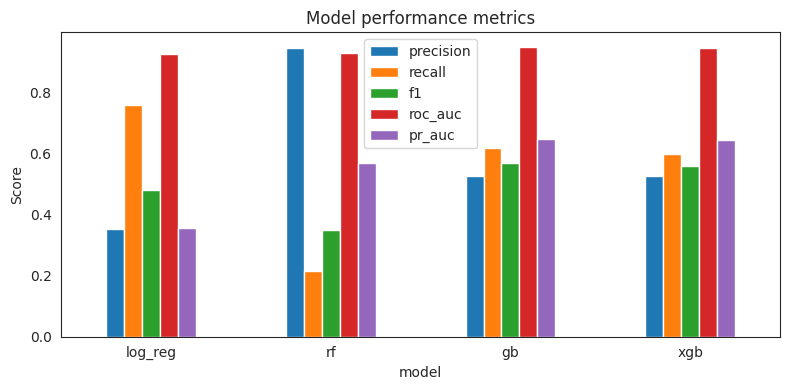

In [73]:
plot_model_metrics(model_metrics)

importances: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.20375667e-06 9.91284575e-06 9.97470057e-06
 1.09044971e-05 1.71468710e-05 2.09227390e-05 3.36937535e-05
 3.66824387e-05 4.39416950e-05 6.21271074e-05 6.42286637e-05
 8.88415095e-05 9.27690415e-05 1.10482591e-04 1.17781721e-04
 1.22240589e-04 1.74747660e-04 3.73773893e-04 3.88592013e-04
 1.07371197e-03 1.59347116e-03 5.77320784e-03 1.17311184e-02
 2.22492100e-02 9.55798313e-01]


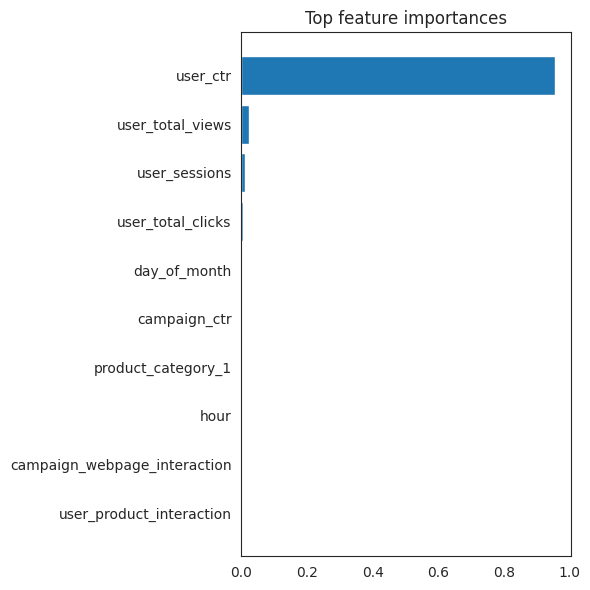

In [83]:
model = models['gb']
feature_names = X_train.columns
plot_feature_importance(model, feature_names, top_n=10)

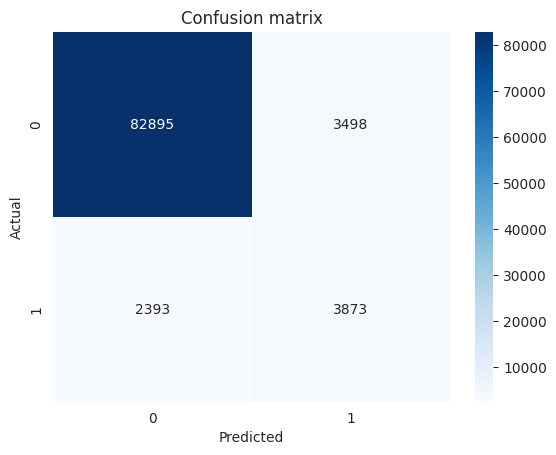

In [76]:
model = models['gb']
threshold = result['best_threshold'] #0.83
y_proba = model.predict_proba(X_val_scaled)[:, 1]
y_pred = (y_proba >= threshold).astype(int)
plot_confusion_matrix_pretty(y_val, y_pred)


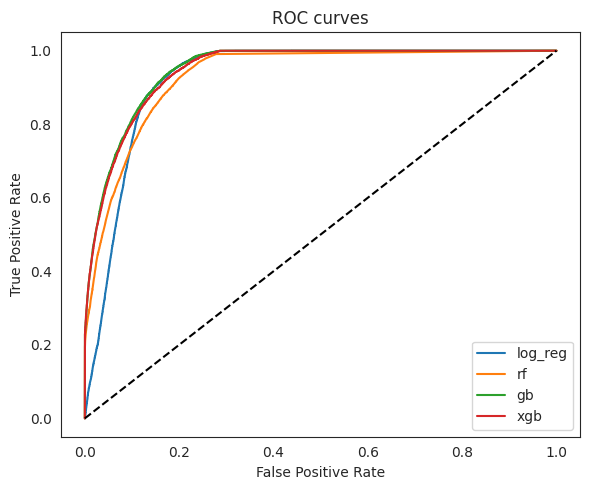

In [78]:
plot_roc_curve(models, X_val_scaled, y_val)


# Observations and inferences

Gradient Boosting is the best overall model because it achieves the highest F1 and PR-AUC while keeping ROC-AUC very strong, and its feature importance plot is consistent with intuitive CTR drivers like user history and campaign performance.
Note that for an imbalaced dataset, the PR-AUC and F1 are far more reliable metric than ROC-AUC because PR-AUC directly focuses on the precision and recall, whereas ROC-AUC focuses on positives over negatives which could be misleading in imbalanced CTR case.


### Interpreting the metrics
**Logistic Regression:** High recall (0.76) but low precision (0.35) means it flags many clicks but with many false positives, which is costly in an ads setting.

**Random Forest:** Extremely high precision (0.95) but very low recall (0.21) means it catches only a small fraction of actual clickers, leaving a lot of revenue on the table.

**Gradient Boosting:** Balanced precision (0.53) and recall (0.62) give the best F1 (0.57) and best PR-AUC (~0.65), indicating the best trade-off for an imbalanced CTR problem.

**XGBoost:** Very similar to Gradient Boosting, but slightly lower F1 and PR-AUC, so GB edges it out.

### Rational behind higher Optimum threshold of 0.83

With an imbalanced dataset, using the default threshold 0.5 often yields too many false positives; increasing the threshold focuses on the highest‑confidence predicted clicks.
​

At threshold 0.83, GB still keeps recall reasonably high while raising precision, which is exactly what the improved F1 and PR‑AUC summarize: better quality positive predictions without losing too many real clickers.


### Rationalizing the feature importance plot
User-level history dominates: user_ctr, user_total_views, user_sessions, user_total_clicks being the top features means the model mostly learns “this user’s past behavior is the strongest signal of future clicks,” which is exactly what recommender/ads systems see in practice.

### Business Interpretation

The model says: “Users who historically click more (high user_ctr, many user_total_clicks) are the primary targets for future clicks,” which matches how advertisers prioritize retargeting and heavy engagers.
